## Traffic Accident Prediction - CLASSIFICATION PROBLEM

This dataset contains data designed to predict the occurrence and severity of traffic accidents based on various factors affecting road conditions, driver behavior, and traffic situations. 

Weather: The impact of weather conditions on the likelihood of accidents.
- Clear: No adverse weather conditions.
- Rainy: Rainy conditions increase the chance of accidents.
- Foggy: Foggy conditions reduce visibility, increasing accident chances.
- Snowy: Snow can cause slippery roads and higher accident probability.
- Stormy: Stormy weather can create hazardous driving conditions.

Road_Type: The type of road, influencing the probability of accidents.
- Highway: High-speed roads with higher chances of severe accidents.
- City Road: Roads within city limits, typically with more traffic and lower speeds.
- Rural Road: Roads outside urban areas, often with fewer vehicles and lower speeds.
- Mountain Road: Roads with curves and elevation changes, increasing accident risk.

Time_of_Day: The time of day when the accident occurs.
- Morning: The period between sunrise and noon.
- Afternoon: The period between noon and evening.
- Evening: The period just before sunset.
- Night: The nighttime, often associated with reduced visibility and higher risk.

Traffic_Density: The level of traffic on the road.
- 0: Low density (few vehicles).
- 1: Moderate density.
- 2: High density (many vehicles).

Speed_Limit: The maximum allowed speed on the road.

Number_of_Vehicles: The number of vehicles involved in the accident, ranging from 1 to 5.

Driver_Alcohol: Whether the driver consumed alcohol.
- 0: No alcohol consumption.
- 1: Alcohol consumption (which increases the likelihood of an accident).

Accident_Severity: The severity of the accident.
- Low: Minor accident.
- Moderate: Moderate accident with some damage or injuries.
- High: Severe accident with significant damage or injuries.

Road_Condition: The condition of the road surface.
- Dry: Dry roads with minimal risk.
- Wet: Wet roads due to rain, increasing the risk of accidents.
- Icy: Ice on the road, significantly increasing the risk of accidents.
- Under Construction: Roads under construction, which may have obstacles or poor road quality.

Vehicle_Type: The type of vehicle involved in the accident.
- Car: A regular passenger car.
- Truck: A large vehicle used for transporting goods.
- Motorcycle: A two-wheeled motor vehicle.
- Bus: A large vehicle used for public transportation.

Driver_Age: The age of the driver. Values range from 18 to 70 years old.

Driver_Experience: The years of experience the driver has. Values range from 0 to 50 years of experience.

Road_Light_Condition: The lighting conditions on the road.
- Daylight: Daytime, when visibility is typically good.
- Artificial Light: Road is illuminated with streetlights.
- No Light: Road is not illuminated, typically during the night in poorly lit areas.

#### 1. Load the dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [2]:
# load train and test set
dataset = pd.read_csv(r"D:\Политех\3 курс\Семинар по специальности\final_project\train.csv", sep = ",", low_memory = False)
test_set = pd.read_csv(r"D:\Политех\3 курс\Семинар по специальности\final_project\test.csv", sep = ",", low_memory = False)
dataset.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [3]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  558
#Train-features =  14
#Test-samples =  281
#Test-features =  14


In [4]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 14 
 Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')
Numerical features: 
 ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident']
Categorical features: 
 ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']


#### 2. Data Cleaning

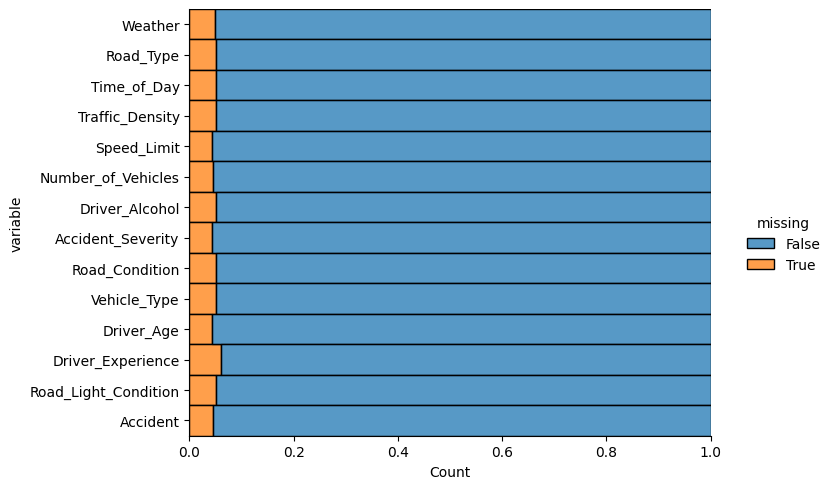

In [5]:
dp.filter_missing(dataset)

Weather

In [6]:
dataset["Weather"]

0       Rainy
1       Clear
2       Rainy
3       Clear
4       Rainy
        ...  
553     Rainy
554     Snowy
555     Foggy
556     Clear
557    Stormy
Name: Weather, Length: 558, dtype: object

In [7]:
def clean_weather(frame):
    frame["Clear"] = frame["Weather"].str.lower().str.contains("clear").astype(bool)
    frame["Rainy"] = frame["Weather"].str.lower().str.contains("rainy").astype(bool)
    frame["Foggy"] = frame["Weather"].str.lower().str.contains("foggy").astype(bool)
    frame["Snowy"] = frame["Weather"].str.lower().str.contains("snowy").astype(bool)
    frame["Stormy"] = frame["Weather"].str.lower().str.contains("stormy").astype(bool)
    return frame

In [8]:
def clean_road_type(frame):
    frame["Highway"] = frame["Road_Type"].str.lower().str.contains("highway").astype(bool)
    frame["City Road"] = frame["Road_Type"].str.lower().str.contains("city road").astype(bool)
    frame["Rural Road"] = frame["Road_Type"].str.lower().str.contains("rural road").astype(bool)
    frame["Mountain Road"] = frame["Road_Type"].str.lower().str.contains("mountain road").astype(bool)
    return frame

In [9]:
def clean_time_of_day(frame):
    frame["Morning"] = frame["Time_of_Day"].str.lower().str.contains("morning").astype(bool)
    frame["Afternoon"] = frame["Time_of_Day"].str.lower().str.contains("afternoon").astype(bool)
    frame["Evening"] = frame["Time_of_Day"].str.lower().str.contains("evening").astype(bool)
    frame["Night"] = frame["Time_of_Day"].str.lower().str.contains("night").astype(bool)
    return frame

In [10]:
def clean_road_condition(frame):
    frame["Dry"] = frame["Road_Condition"].str.lower().str.contains("dry").astype(bool)
    frame["Wet"] = frame["Road_Condition"].str.lower().str.contains("wet").astype(bool)
    frame["Icy"] = frame["Road_Condition"].str.lower().str.contains("icy").astype(bool)
    frame["Under Construction"] = frame["Road_Condition"].str.lower().str.contains("under construction").astype(bool)
    return frame

In [11]:
def clean_vehicle_type(frame):
    frame["Car"] = frame["Vehicle_Type"].str.lower().str.contains("car").astype(bool)
    frame["Truck"] = frame["Vehicle_Type"].str.lower().str.contains("rruck").astype(bool)
    frame["Motorcycle"] = frame["Vehicle_Type"].str.lower().str.contains("motorcycle").astype(bool)
    frame["Bus"] = frame["Vehicle_Type"].str.lower().str.contains("bus").astype(bool)
    return frame

In [12]:
def clean_road_light_condition(frame):
    frame["Daylight"] = frame["Road_Light_Condition"].str.lower().str.contains("daylight").astype(bool)
    frame["Artificial Light"] = frame["Road_Light_Condition"].str.lower().str.contains("artificial light").astype(bool)
    frame["No Light"] = frame["Road_Light_Condition"].str.lower().str.contains("no light").astype(bool)
    return frame

Master function to clean data

In [14]:
cat_cols

['Weather',
 'Road_Type',
 'Time_of_Day',
 'Accident_Severity',
 'Road_Condition',
 'Vehicle_Type',
 'Road_Light_Condition']

In [15]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # cleaning for weather
    frame = clean_weather(frame)
    # cleaning for road types
    frame = clean_road_type(frame)
    # cleaning for time of day
    frame = clean_time_of_day(frame)
    # cleaning for road conditions
    frame = clean_road_condition(frame)
    # cleaning for vehicle types
    frame = clean_vehicle_type(frame)
    # cleaning for road light conditions
    frame = clean_road_light_condition(frame)
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # drop non-important columns
    frame = frame.drop(columns=['Number_of_Vehicles', 'Accident_Severity'], axis=1)

    
    for f in frame.columns:
        if is_test and f == "Accident":
            break
        if pd.api.types.is_numeric_dtype(frame[f]):
            frame[f] = frame[f].fillna(frame[f].median())
        else:
            frame[f] = frame[f].fillna(frame[f].mode()[0])

    return frame



Cleaned dataset

In [16]:
dataset = clean_data(dataset)
dataset.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,...,Wet,Icy,Under Construction,Car,Truck,Motorcycle,Bus,Daylight,Artificial Light,No Light
0,Rainy,City Road,Morning,1.0,100.0,0.0,Wet,Car,51.0,48.0,...,True,False,False,True,False,False,False,False,True,False
1,Clear,Rural Road,Night,1.0,120.0,0.0,Wet,Truck,49.0,43.0,...,True,False,False,False,False,False,False,False,True,False
2,Rainy,Highway,Evening,1.0,60.0,0.0,Icy,Car,54.0,52.0,...,False,True,False,True,False,False,False,False,True,False
3,Clear,City Road,Afternoon,2.0,60.0,0.0,Under Construction,Bus,34.0,31.0,...,False,False,True,False,False,False,True,True,False,False
4,Rainy,Highway,Morning,1.0,195.0,0.0,Dry,Car,62.0,55.0,...,False,False,False,True,False,False,False,False,True,False


Redefine metadata

In [17]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 36 
 Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Driver_Alcohol', 'Road_Condition', 'Vehicle_Type', 'Driver_Age',
       'Driver_Experience', 'Road_Light_Condition', 'Accident', 'Clear',
       'Rainy', 'Foggy', 'Snowy', 'Stormy', 'Highway', 'City Road',
       'Rural Road', 'Mountain Road', 'Morning', 'Afternoon', 'Evening',
       'Night', 'Dry', 'Wet', 'Icy', 'Under Construction', 'Car', 'Truck',
       'Motorcycle', 'Bus', 'Daylight', 'Artificial Light', 'No Light'],
      dtype='object')
Numerical features: 
 ['Traffic_Density', 'Speed_Limit', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident', 'Clear', 'Rainy', 'Foggy', 'Snowy', 'Stormy', 'Highway', 'City Road', 'Rural Road', 'Mountain Road', 'Morning', 'Afternoon', 'Evening', 'Night', 'Dry', 'Wet', 'Icy', 'Under Construction', 'Car', 'Truck', 'Motorcycle', 'Bus', 'Daylight', 'Artificial Light', 'No Light']
Categorical features: 
 ['Weather', 'Road_Type'

#### 3. Exploratory Data Analysis

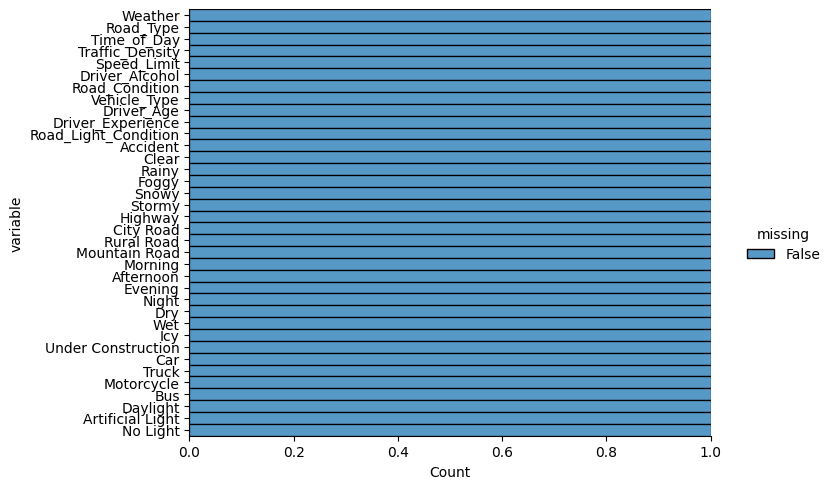

0


In [18]:
# filter missing values
dp.filter_missing(dataset)
print(dataset.isnull().sum().sum())

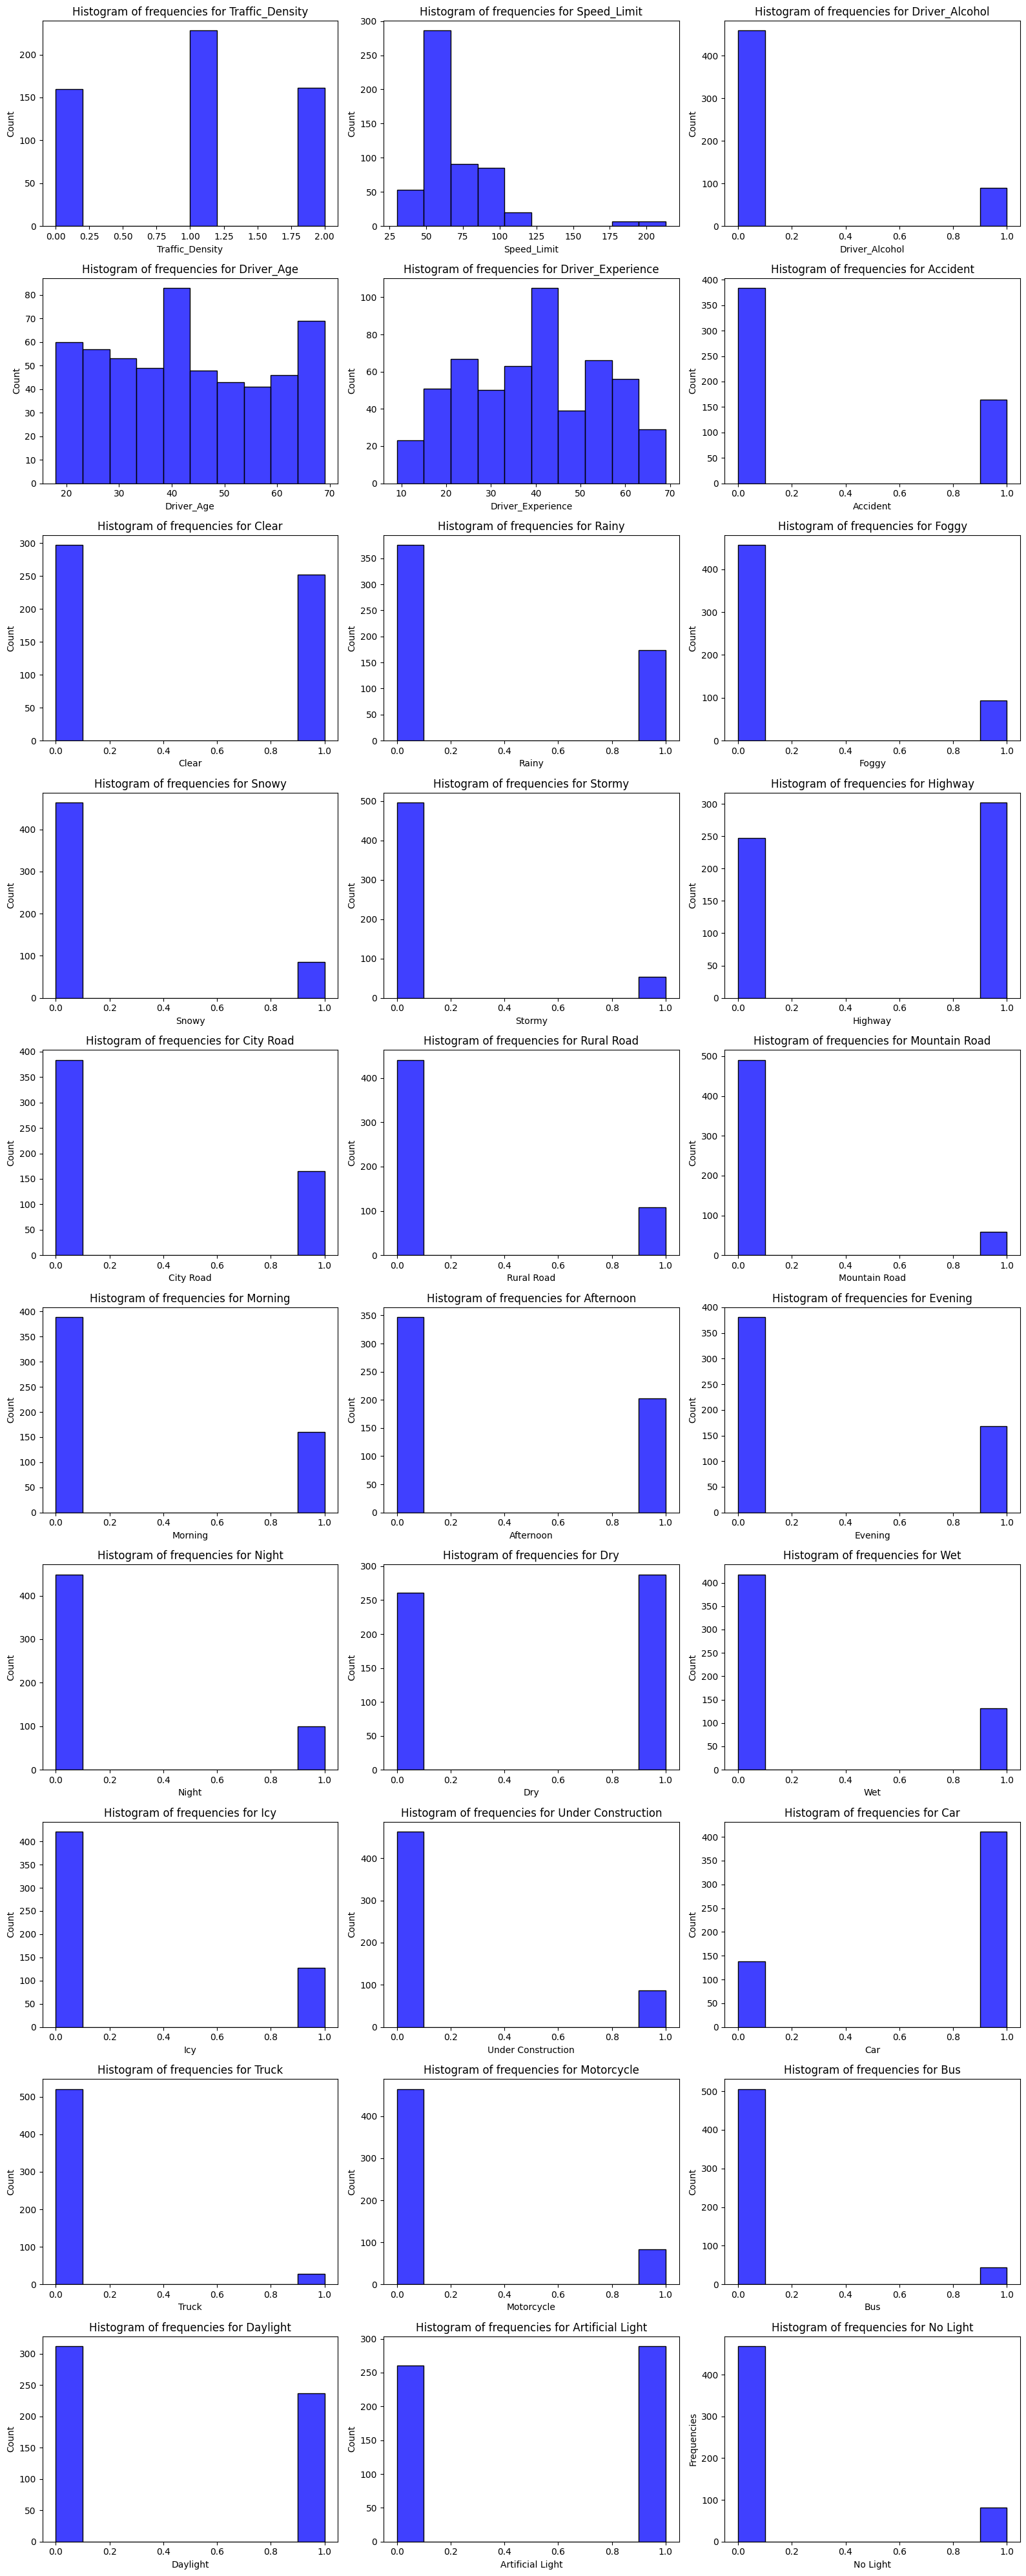

In [19]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [20]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Weather ******
Weather
Clear     252
Rainy     147
Foggy      66
Snowy      58
Stormy     26
Name: count, dtype: int64

***** Road_Type ******
Road_Type
Highway          302
City Road        137
Rural Road        80
Mountain Road     30
Name: count, dtype: int64

***** Time_of_Day ******
Time_of_Day
Afternoon    202
Evening      141
Morning      133
Night         73
Name: count, dtype: int64

***** Road_Condition ******
Road_Condition
Dry                   288
Wet                   103
Icy                   100
Under Construction     58
Name: count, dtype: int64

***** Vehicle_Type ******
Vehicle_Type
Car           411
Truck          67
Motorcycle     56
Bus            15
Name: count, dtype: int64

***** Road_Light_Condition ******
Road_Light_Condition
Artificial Light    289
Daylight            208
No Light             52
Name: count, dtype: int64


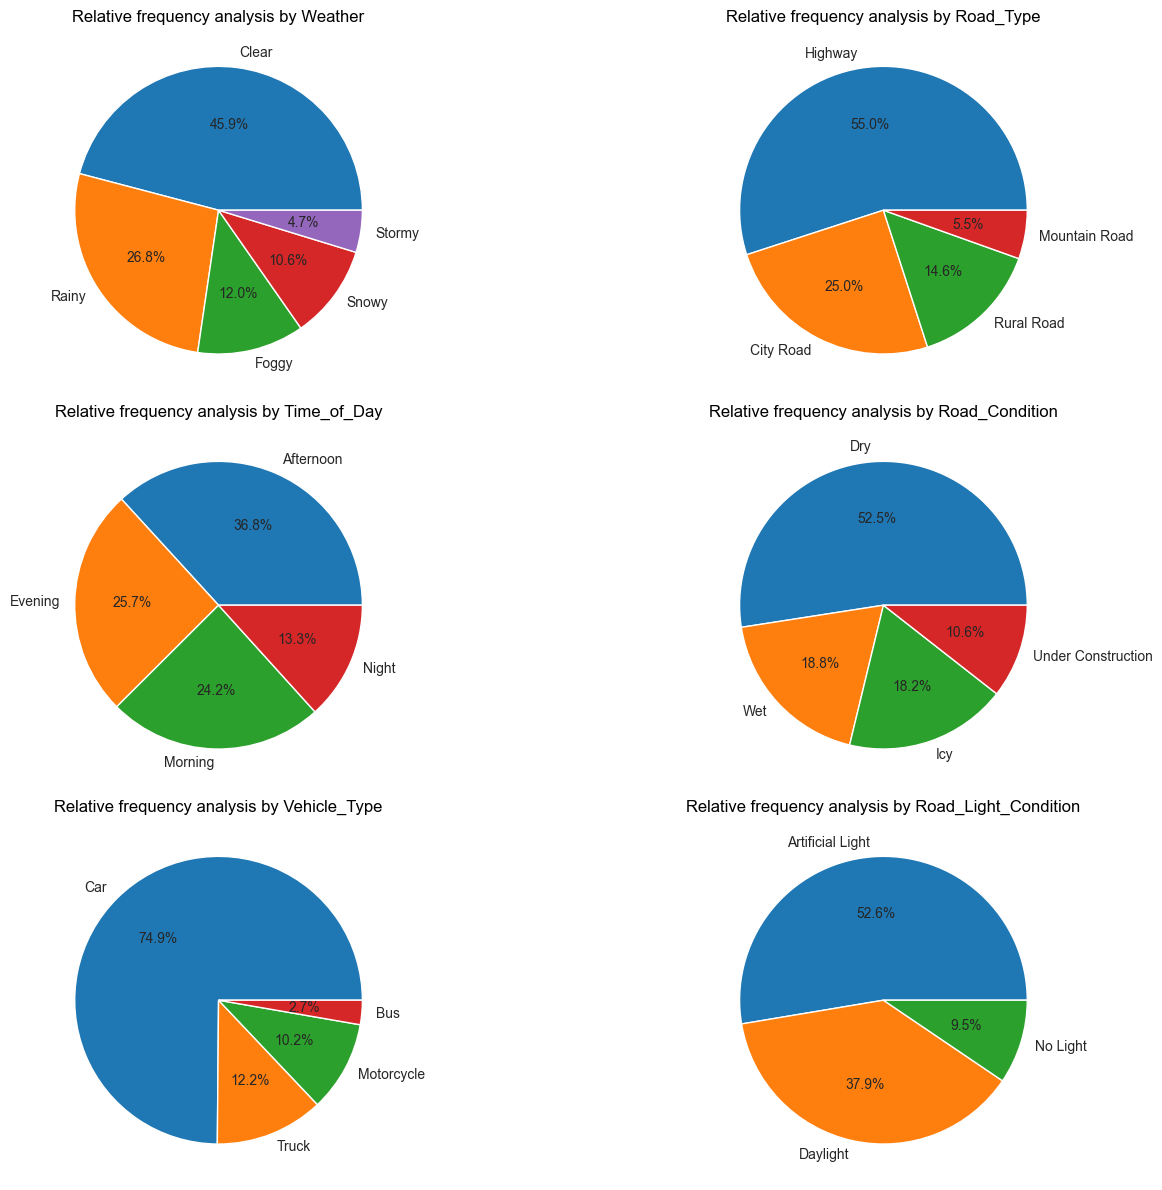

In [21]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [22]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Accident"]
y = dataset["Accident"]

In [23]:
x.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,...,Wet,Icy,Under Construction,Car,Truck,Motorcycle,Bus,Daylight,Artificial Light,No Light
0,Rainy,City Road,Morning,1.0,100.0,0.0,Wet,Car,51.0,48.0,...,True,False,False,True,False,False,False,False,True,False
1,Clear,Rural Road,Night,1.0,120.0,0.0,Wet,Truck,49.0,43.0,...,True,False,False,False,False,False,False,False,True,False
2,Rainy,Highway,Evening,1.0,60.0,0.0,Icy,Car,54.0,52.0,...,False,True,False,True,False,False,False,False,True,False
3,Clear,City Road,Afternoon,2.0,60.0,0.0,Under Construction,Bus,34.0,31.0,...,False,False,True,False,False,False,True,True,False,False
4,Rainy,Highway,Morning,1.0,195.0,0.0,Dry,Car,62.0,55.0,...,False,False,False,True,False,False,False,False,True,False


In [24]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (549, 35)
Dimension of target =  (549,)


Split train and test set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (439, 35)
Y-train:  439
X-test dim:  (110, 35)
Y-test:  110


Transforming the numerical and categorical features  
 

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ['Driver_Age', 'Driver_Experience']),  
    (RobustScaler(), ['Speed_Limit']),
    (OneHotEncoder(handle_unknown="ignore"), ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'])    
)

In [27]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Driver_Age', 'Driver_Experience']),
                                ('robustscaler', RobustScaler(),
                                 ['Speed_Limit']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Weather', 'Road_Type', 'Time_of_Day',
                                  'Road_Condition', 'Vehicle_Type',
                                  'Road_Light_Condition'])])

In [28]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [29]:
x_train

array([[-0.00980227, -1.89859573,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.33386261,  0.01791412,  0.66666667, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.98324299,  1.14138541, -1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.45361885,  0.61269304, -1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.51982187,  0.81095268, -0.33333333, ...,  1.        ,
         0.        ,  0.        ],
       [-1.2676596 , -1.56816299, -1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [30]:
y_train

118    1.0
159    0.0
555    0.0
286    0.0
461    1.0
      ... 
70     0.0
279    0.0
9      0.0
362    1.0
192    0.0
Name: Accident, Length: 439, dtype: float64

In [31]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  [0. 1.]


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [32]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [33]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Time of training KNN: 3.259 seconds


In [34]:
knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [35]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predicted values in train:  [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
real values in test:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted values in test:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [36]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [37]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

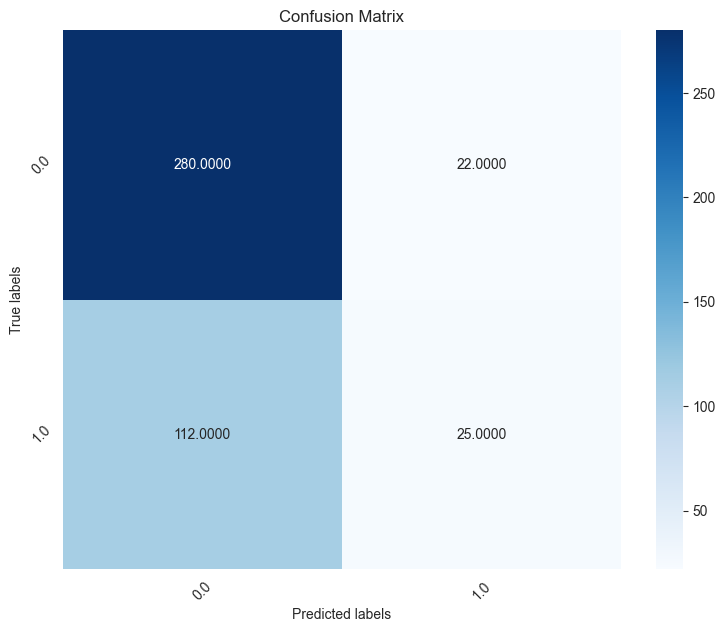

In [38]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

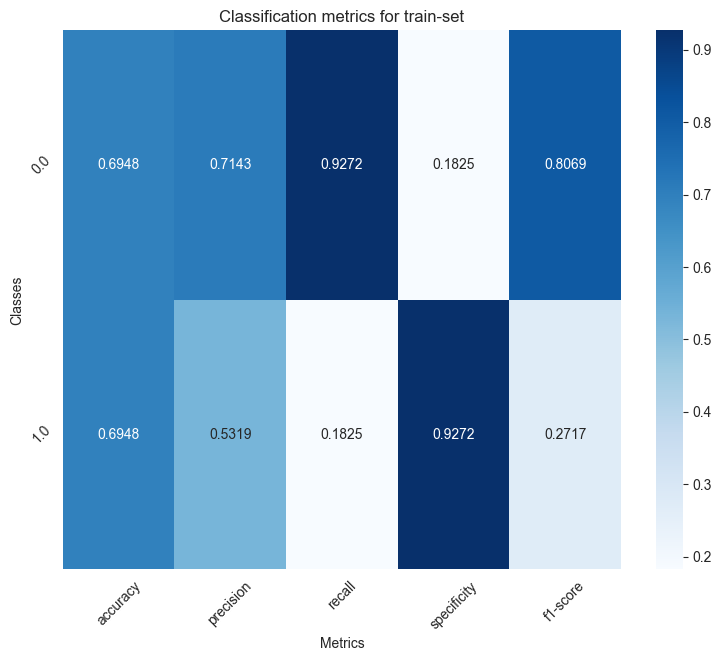

In [39]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

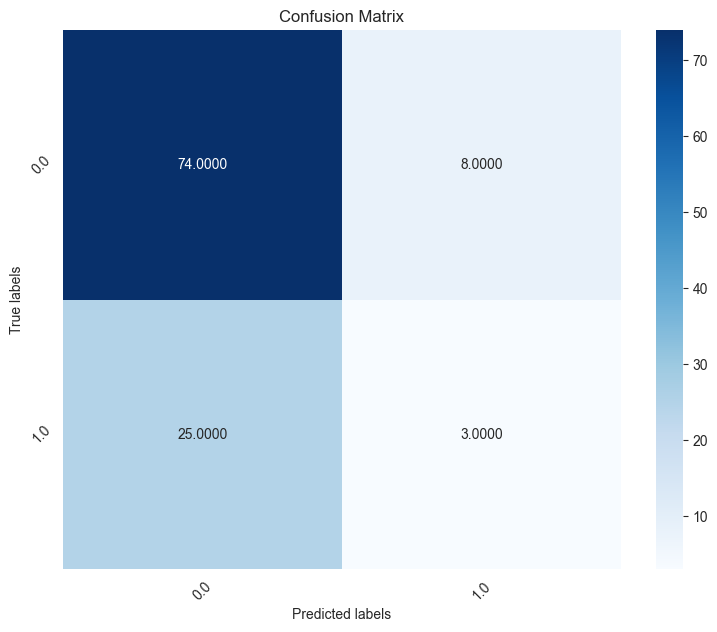

In [40]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

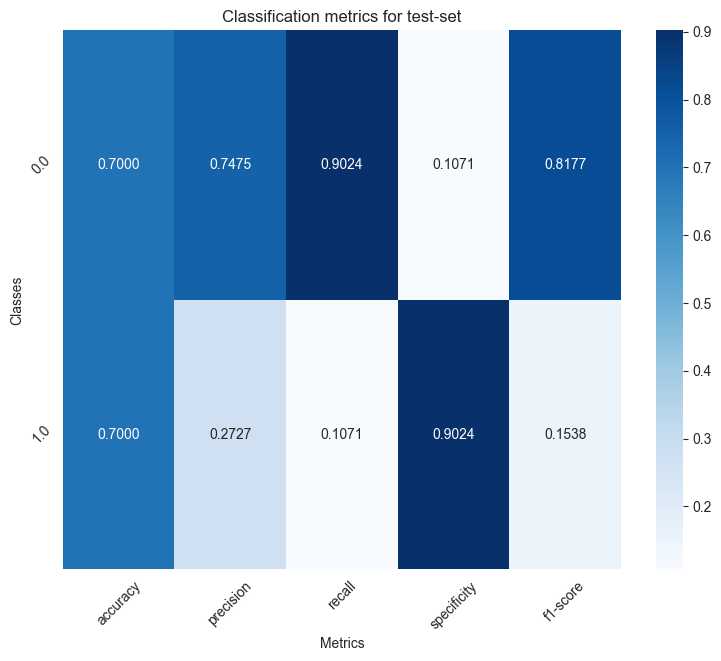

In [41]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [42]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.7,0.510101,0.504791,0.504791,0.485763


SVM Classifier

In [43]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Time of training SVM: 0.307 seconds


In [44]:
svm_model

SVC(C=1, class_weight='balanced', gamma='auto', kernel='poly')

In [45]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predicted values in train:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
real values in test:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted values in test:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [47]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

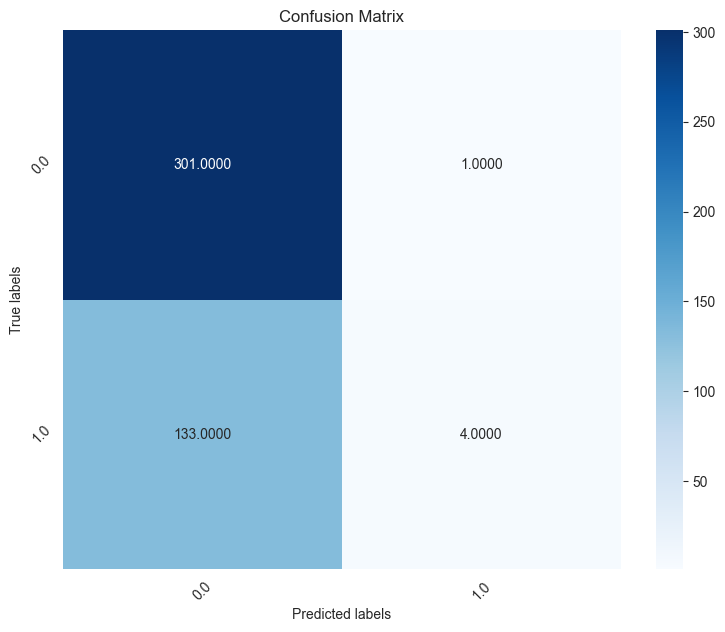

In [48]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

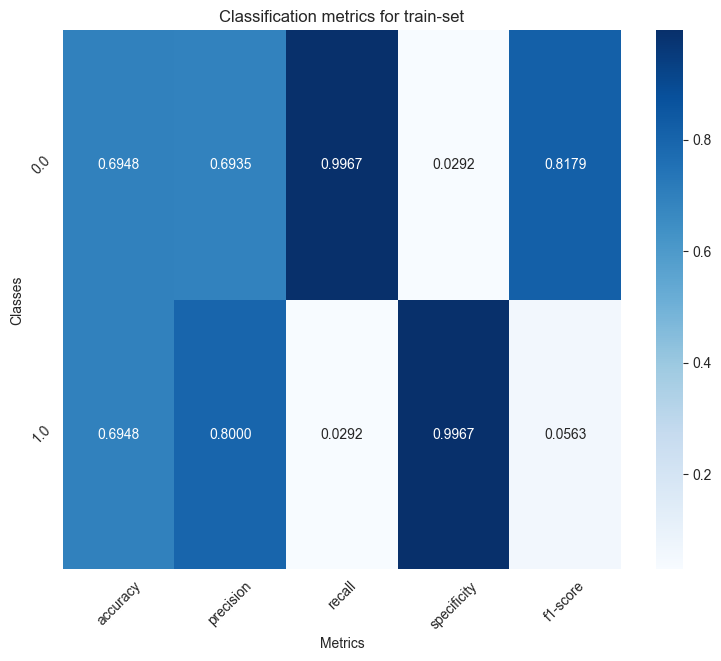

In [49]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

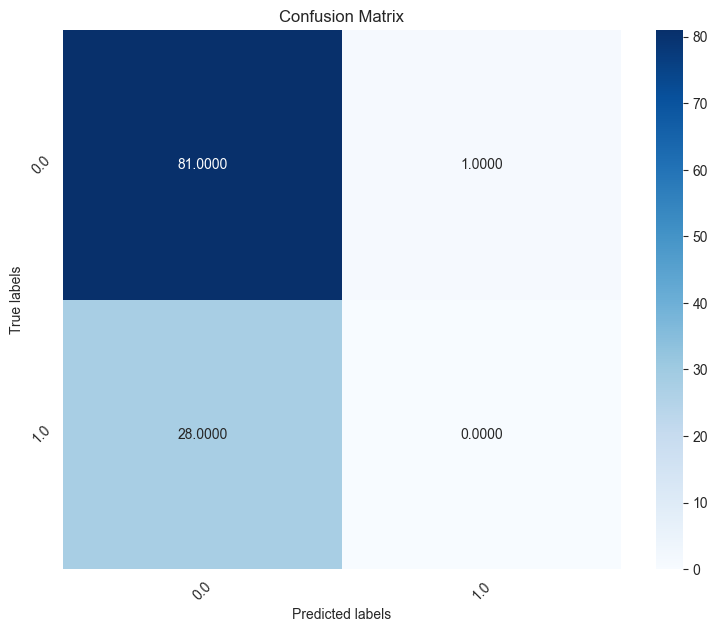

In [50]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

d:\Политех\3 курс\Семинар по специальности\final_project\scripts\evaluator.py:44: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall)/(precision + recall)


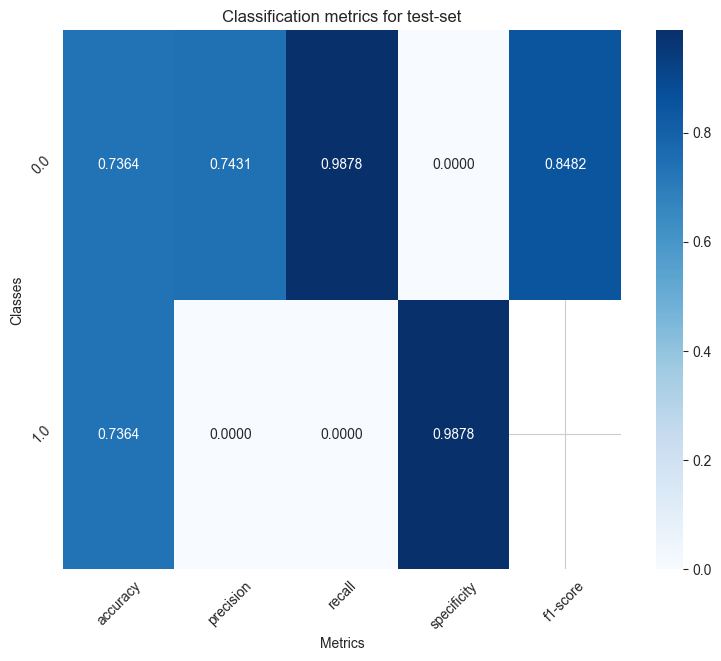

In [51]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [52]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.736364,0.37156,0.493902,0.493902,0.848168


Random Forest Classifier

In [53]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 20}
Time of training Random Forest: 3.625 seconds


In [54]:
rf_model

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=20,
                       n_estimators=20)

In [55]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predicted values in train:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
real values in test:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted values in test:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [56]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [57]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

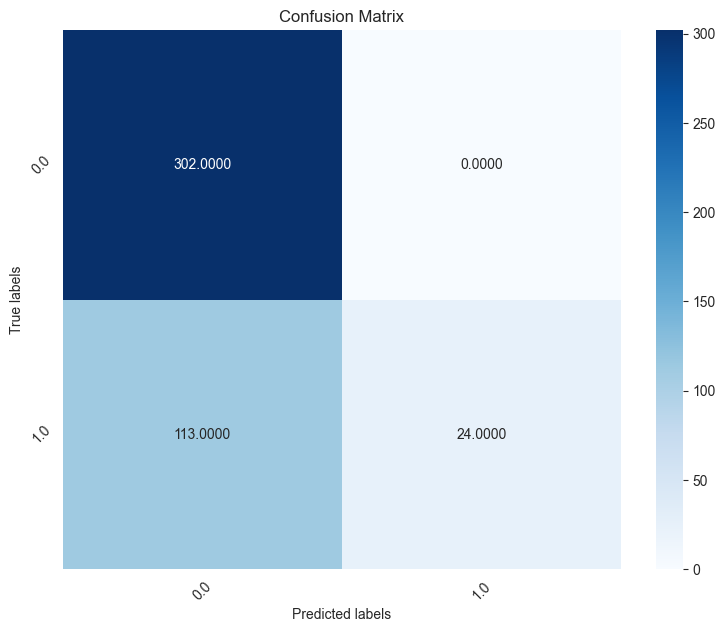

In [58]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

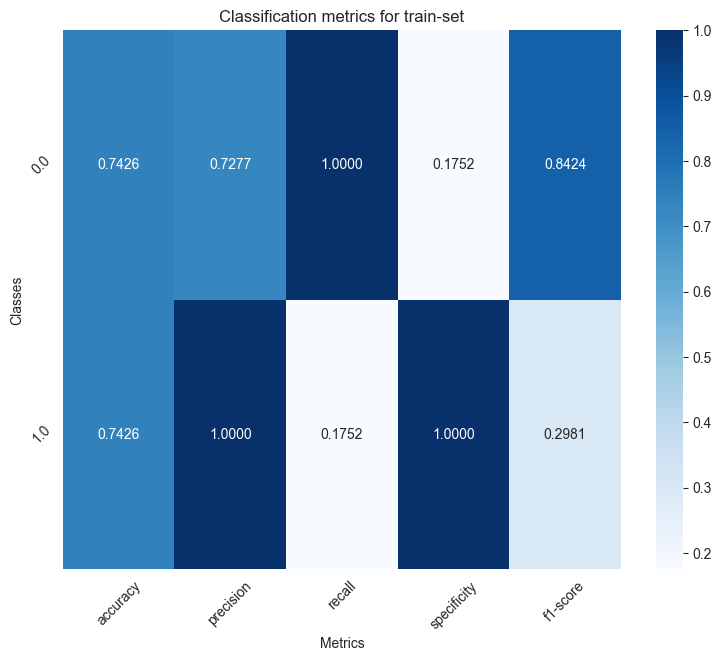

In [59]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

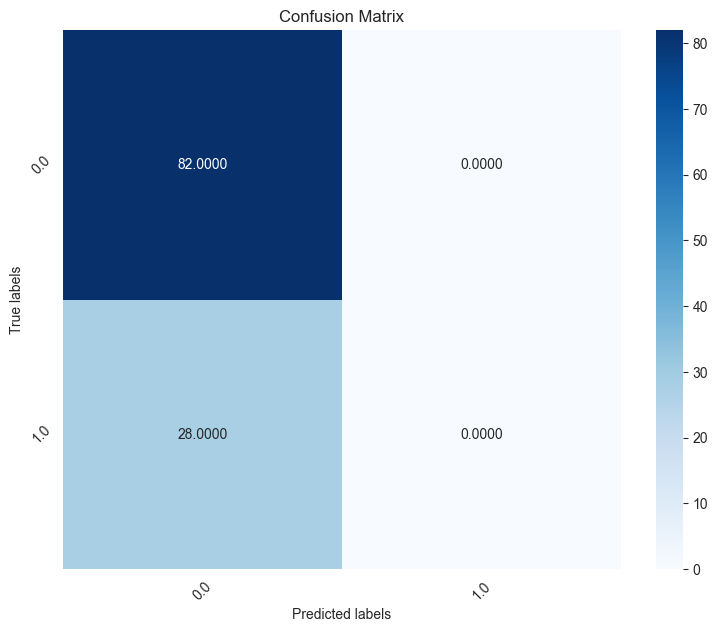

In [60]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

d:\Политех\3 курс\Семинар по специальности\final_project\scripts\evaluator.py:41: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp + fp)


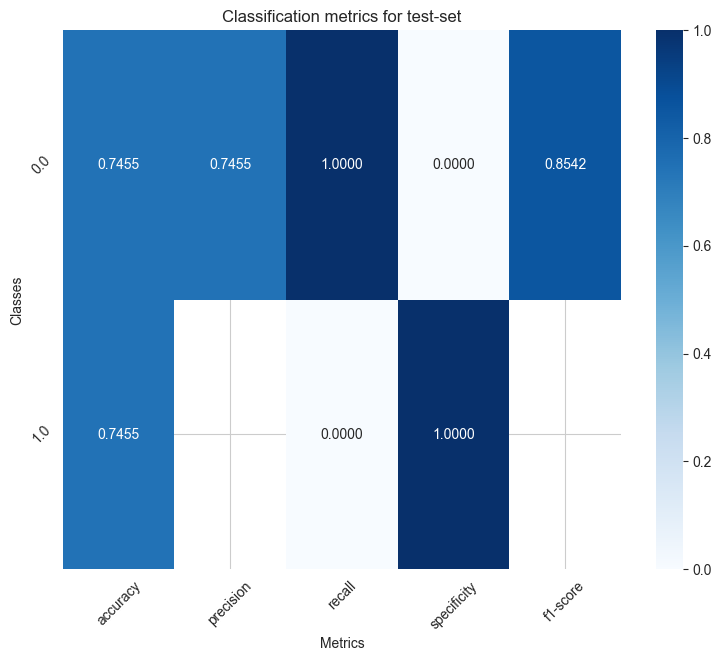

In [61]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [62]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.745455,0.745455,0.5,0.5,0.854167


XGBoost Classifier

LightGBM Classifier

Monitoring using Benchmarks